In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import researchpy as rp

In [9]:
df = pd.read_csv('listings_limpio.csv', index_col=0)
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Chamartín,Private room,59,1,81,0.57,1,149,3
1,Latina,Private room,31,4,33,0.38,2,131,0
2,Arganzuela,Entire home/apt,50,15,0,NaN,6,311,0
3,Centro,Entire home/apt,92,5,14,0.16,1,167,4
4,Arganzuela,Private room,29,2,154,1.09,1,344,5


In [26]:
df.isna().sum()

neighbourhood_group                  0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4013
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

 - La única columna que tiene nulos es reviews_per_month (4013 de 17606)

# EJERCICIO 1

Chequead los outliers y haced la gestión de ellos, como aprendimos en las lecciones de limpieza.

In [10]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,59,1,81,0.57,1,149,3
1,31,4,33,0.38,2,131,0
2,50,15,0,NaN,6,311,0
3,92,5,14,0.16,1,167,4
4,29,2,154,1.09,1,344,5


In [11]:
df.shape

(17606, 9)

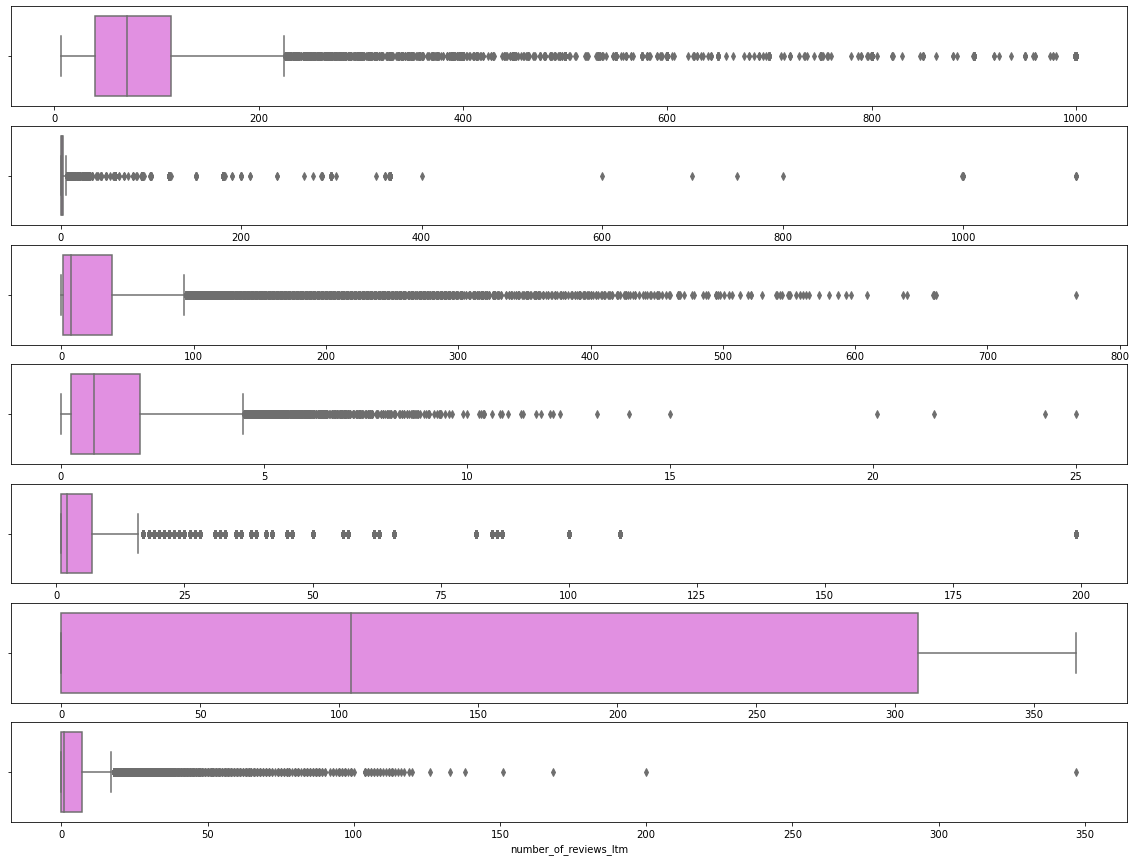

In [12]:
fig, ax= plt.subplots(7,1, figsize=(20,15))
i=0
for column in df_numericas.columns:
    sns.boxplot(x=column, data=df_numericas, color='violet', ax=ax[i])
    ax[i].set(xlabel=column)
    i+=1



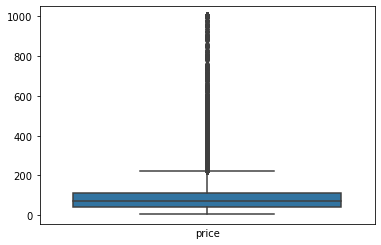

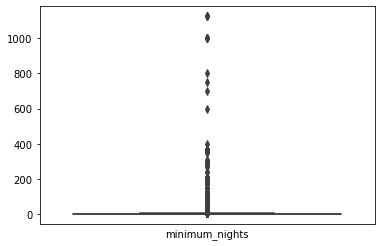

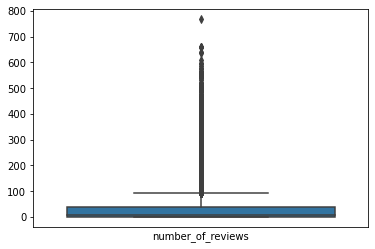

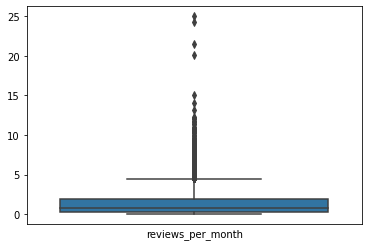

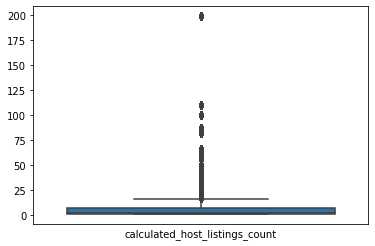

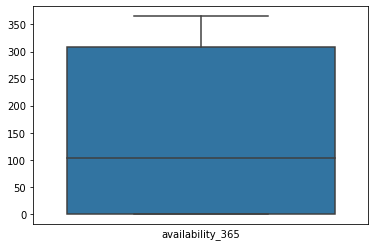

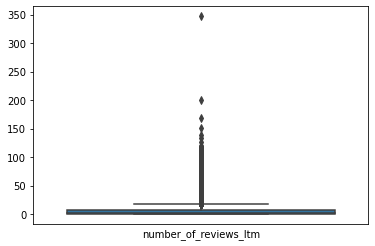

In [13]:
for column in df_numericas.columns:
    plt.figure()
    sns.boxplot(data=df[column])
    plt.xlabel(column)
    plt.xticks([])

In [14]:
def detectar_outliers(column, df_numericas): 
    
    dicc_indices = {}
    
    Q1 = np.nanpercentile(df_numericas[column], 25)
    Q3 = np.nanpercentile(df_numericas[column], 75)
        
    IQR = Q3 - Q1
        
    limites_outliers = 1.5 * IQR
        
    datos_outliers = df_numericas[(df_numericas[column] < Q1 - limites_outliers) | (df_numericas[column] > Q3 + limites_outliers)]
        
        
    if datos_outliers.shape[0] > 0:  
        
        dicc_indices[column] = (list(datos_outliers.index)) 
        

    
    return dicc_indices 

In [15]:
for x in df_numericas:
    ind = detectar_outliers(x, df_numericas)

In [29]:
for k, v in ind.items():
    media = df[k].mean() 
    median = df[k].median()
    if k == "total_rooms" or k == "median_income":
        for i in v: 
            df.loc[i,k] = media 
    else:
        df.loc[i,k] = median 

In [30]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Chamartín,Private room,59,1,81,0.57,1,149,3
1,Latina,Private room,31,4,33,0.38,2,131,0
2,Arganzuela,Entire home/apt,50,15,0,NaN,6,311,0
3,Centro,Entire home/apt,92,5,14,0.16,1,167,4
4,Arganzuela,Private room,29,2,154,1.09,1,344,5


In [17]:
df_numericas.price

0         59
1         31
2         50
3         92
4         29
        ... 
17826     80
17827    185
17828    104
17829     18
17830     33
Name: price, Length: 17606, dtype: int64

# EJERCICIO 2

¿Sigue la columma price una distribución normal? Chequeadlo visual y analiticamente.
En caso de que no siga una distribución normal, realizad la transformación necesaria para que se ajuste a una normal.

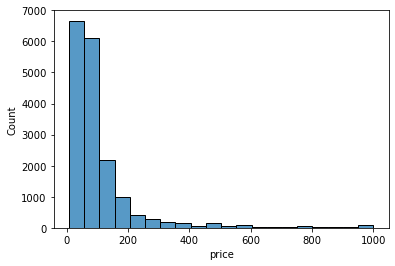

In [31]:
sns.histplot(df["price"],  bins=20);

 - No tiene una distribución normal porque no tiene forma de campana de Gauss.

In [33]:
stats.shapiro(df["price"].sample(5000))

ShapiroResult(statistic=0.5782289505004883, pvalue=0.0)

In [34]:
df['price'], lambda_ajustada = stats.boxcox(df['price'])

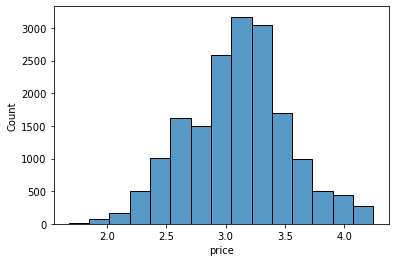

In [35]:
sns.histplot(df["price"], bins=15);

 - Ahora la columna 'price' tiene una distribución normal.

# EJERCICIO 3

Chequead la independencia entre las siguientes columnas: neighbourhood_group y room_type

In [40]:
crosstab, test_results, expected = rp.crosstab(df["neighbourhood_group"], df["room_type"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [41]:
crosstab.head()

room_type                                           
room_type           Entire home/apt Hotel room Private room Shared room    All
neighbourhood_group                                                           
Arganzuela                     3.21       0.01         2.28        0.02   5.52
Barajas                        0.24       0.00         0.52        0.01   0.78
Carabanchel                    1.39       0.01         2.04        0.02   3.46
Centro                        32.93       0.65        11.48        0.65  45.71
Chamartín                      1.76       0.02         1.06        0.03   2.87

# EJERCICIO 4

Chequead la heterocedasticidad de la columna room_type frente al price


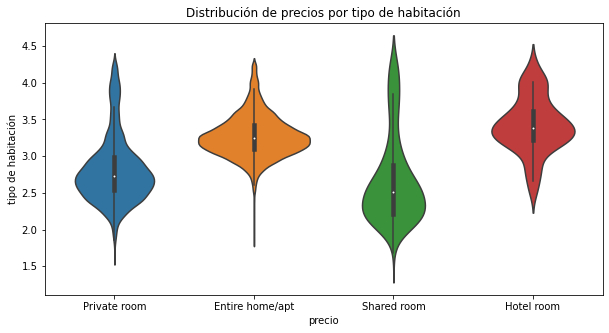

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'room_type',
    y       = 'price',
    data    = df,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de precios por tipo de habitación')
ax.set_xlabel('precio')
ax.set_ylabel('tipo de habitación');

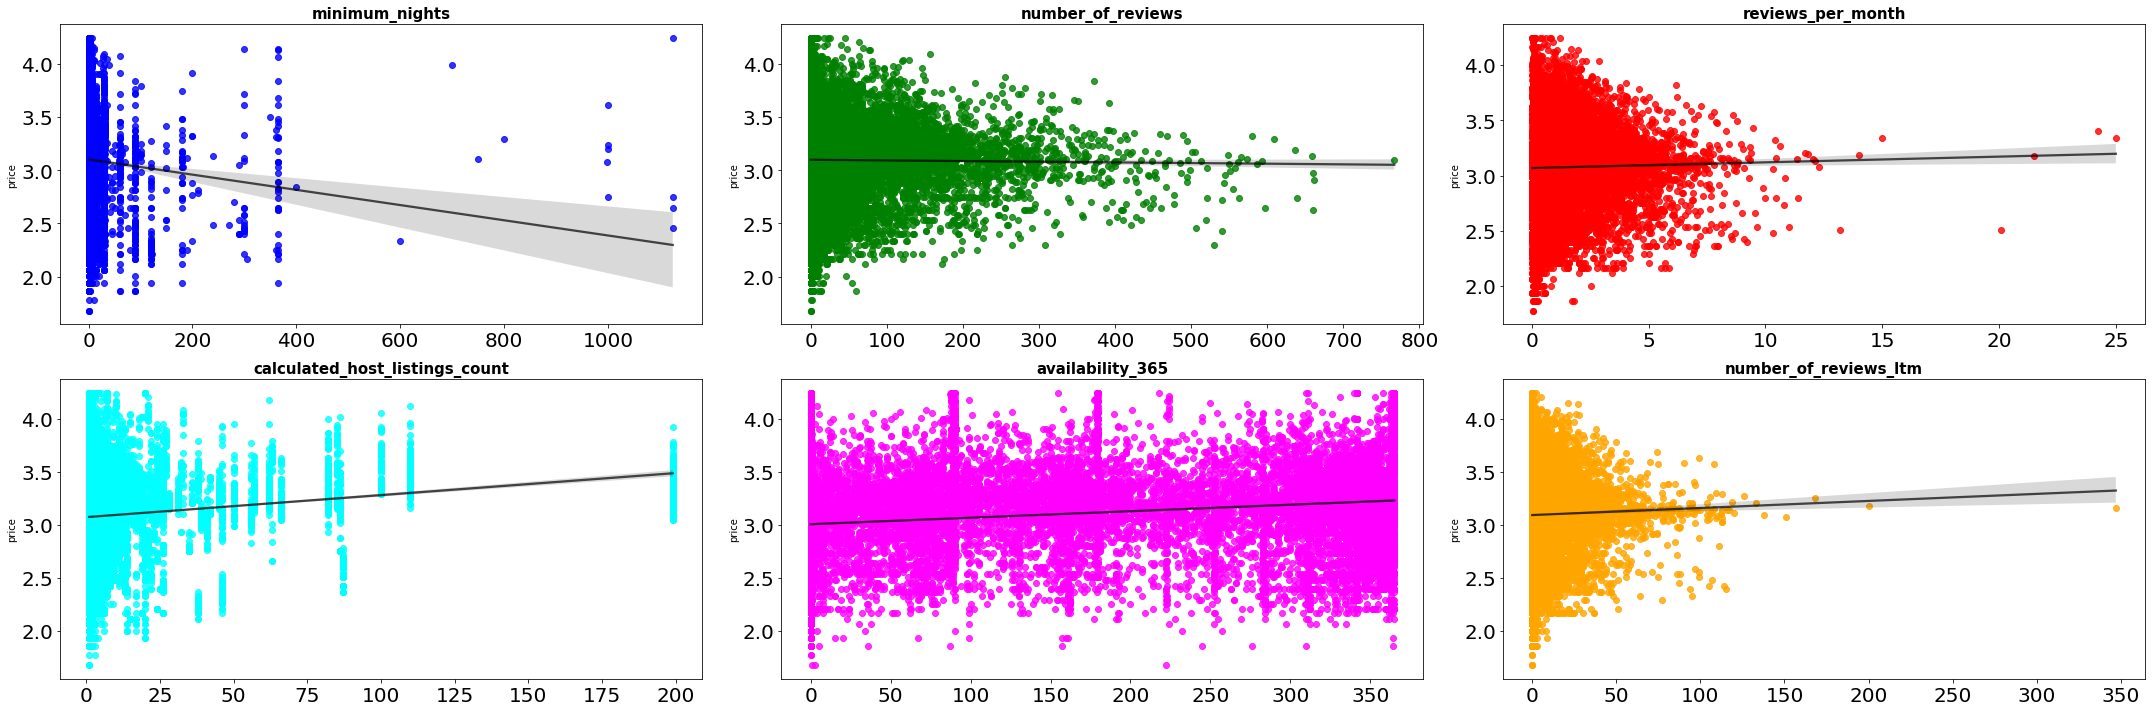

In [44]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('price', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'price',
        color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();